In [19]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import imutils

import selectivesearch

'3.3.1'

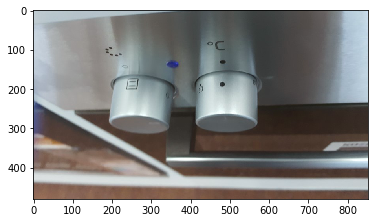

In [31]:
img = cv2.imread('HOG/test/20171118_133030.jpg', 1)

# 20171118_133030 # sehr gutes ergebnis
# 20171118_133028 # blendung stört
#20171118_133018 # läuft
#img = img[:360, :]
plt.imshow(img)

cv2.__version__

In [32]:
#  ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0.9, min_size=20)

940


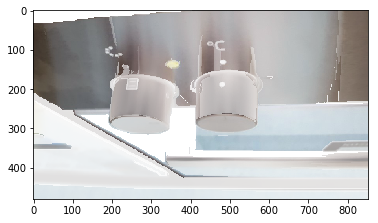

In [33]:
plt.imshow(img_lbl)
print(len(regions))

400 94 184 216
199 172 146 139
196 129 216 181
422 153 147 131
402 75 240 203
199 172 163 139
199 164 163 147
402 75 240 214
400 94 184 186


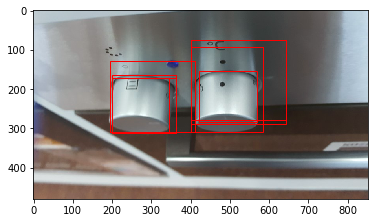

In [34]:
#regions[:10]

#draw rectangles
candidates = set()
for r in regions:
# excluding same rectangle (with different segments)
    if r['rect'] in candidates:
        continue
    # excluding regions smaller than 2000 pixels
    if r['size'] < 2000:
        continue
    # distorted rects
    x, y, w, h = r['rect']
    if w / h > 1.2 or h / w > 1.2:
        continue
    candidates.add(r['rect'])
    
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img.copy())
    
for x, y, w, h in candidates:
    print(x, y, w, h)
    rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)

plt.show()

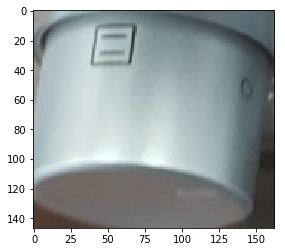

In [40]:
test = img[164:311, 199:362]

plt.imshow(test)

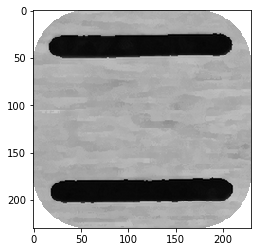

In [56]:
logo = cv2.imread('HOG/train/f4.jpg', 1) 
plt.imshow(logo)

In [55]:
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(test,None)
kp2, des2 = orb.detectAndCompute(logo,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)
len(matches)

error: D:\Build\OpenCV\opencv-3.3.1\modules\core\src\stat.cpp:4017: error: (-215) type == src2.type() && src1.cols == src2.cols && (type == 5 || type == 0) in function cv::batchDistance


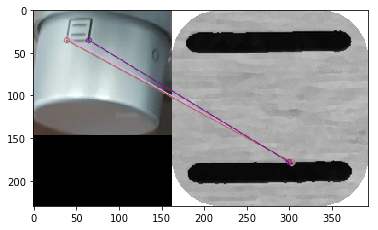

In [45]:
img_out = np.zeros(test.shape) 
img4 = cv2.drawMatches(test,kp1,logo,kp2,matches, outImg=img_out, flags=2)
plt.imshow(img4)